# Session 8

## Exploratory Data Analysis

When examining data clouds, some of the **key characteristics** that need to be considered are:

1. the **location** of the data and its centre of mass
2. the **dispersion** or spread of the data
3. the **shape** of the data


# Plotting with Python

**matplotlib** : It is the most popular Python library for producing plots and other 2D data visualizations.

The library is imported into your code as follows:

**Disadvantages**:
<br> 1.Library enables the user to tweak all aspects of the figures, the user is at first overwhelmed with the number of tunable knobs.
<br> 2.The default matplotlib figures are ugly. It takes a lot of effort (and knowledge) to make the figures aesthetically pleasing.

**seaborn**: It use matplotlib under the hood, but provide the user with an easier interface to it, and default figures which are visually much more appealing. 

**Pylab** : It provides an interface that is very similar to MATLAB, therefore experienced users of MATLAB can make an easy transition to python plotting. We will only minimally make use of Pylab in order to set global appearance settings for the plotting environment.

**Bokeh/Plotly** : It is an interactive plotting environment

# Plotting Univariate and Multivariate Data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams

In [2]:
sns.set(style="ticks")

In [3]:
#Your matplotlib graphs will be included in your notebook, next to the code
%matplotlib inline

Below is a set of tunable parameters for controlling the aesthetics of the graphs.

In [4]:
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

## Dataset 1 - Server Response Times

Load the data into a data frame.

In [5]:
server_data = pd.read_table("ch02_serverdata",header=None)
server_data.head(10)

0
0   452.42
1   318.58
2   144.82
3   129.13
4  1216.45
5   991.56
6  1476.69
7   662.73
8  1302.85
9  1278.55

Get some info on the data type and the number of samples.

In [6]:
server_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


The column had no header so let's see what the default column name is in the data frame.

In [7]:
server_data.columns

Int64Index([0], dtype='int64')

## Dataset 2 - Wine

In [8]:
wine_data = pd.read_csv("wine_data.csv")
wine_data = pd.io.parsers.read_csv(
    'wine_data.csv',
     usecols=[0,1,2,3,4,5]
    )
wine_data.columns=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium']
wine_data.head(10)

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium
0      1    14.23        1.71  2.43               15.6        127
1      1    13.20        1.78  2.14               11.2        100
2      1    13.16        2.36  2.67               18.6        101
3      1    14.37        1.95  2.50               16.8        113
4      1    13.24        2.59  2.87               21.0        118
5      1    14.20        1.76  2.45               15.2        112
6      1    14.39        1.87  2.45               14.6         96
7      1    14.06        2.15  2.61               17.6        121
8      1    14.83        1.64  2.17               14.0         97
9      1    13.86        1.35  2.27               16.0         98

In [9]:
wine_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Class              178 non-null    int64  
 1   Alcohol            178 non-null    float64
 2   Malic acid         178 non-null    float64
 3   Ash                178 non-null    float64
 4   Alcalinity of ash  178 non-null    float64
 5   Magnesium          178 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 8.5 KB


In [10]:
wine_data.describe()


Class     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  
count  178.000000  
mean    99.741573  
std     14.282484  
min     70.000000  
25%     88.000000  
50%     98.000000  
75%    107.000000  
max    162.000000

## Dataset 3 - Tips

In [11]:
# Load the example tips dataset
tips = sns.load_dataset("tips")
tips['percentage'] = tips.tip / tips.total_bill * 100.0

In [12]:
print(tips.info())
tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   percentage  244 non-null    float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 9.3 KB
None


total_bill   tip     sex smoker  day    time  size  percentage
0       16.99  1.01  Female     No  Sun  Dinner     2    5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3   16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3   16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2   13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4   14.680765

We need to get a feel for the data and this can be best achieved visually.

# Basic Plotting 

Plotting methods allow for a handful of plot styles other than the default Line plot. 
These methods can be provided as the kind keyword argument to plot(). These include:

    ‘bar’ or ‘barh’ for bar plots
    ‘hist’ for histogram
    ‘box’ for boxplot
    ‘kde’ or 'density' for density plots
    ‘area’ for area plots
    ‘scatter’ for scatter plots
    ‘hexbin’ for hexagonal bin plots
    ‘pie’ for pie plots


**plot()** : Call this function on a dataframe, it will give us a line graph.
<br>**X-axis** : It is the index     **y-axis** : it is each of the column values
<br> This plot assumes temporal relationship between each of the observations, which in our case is meaningless. We therefore need something more informative. 

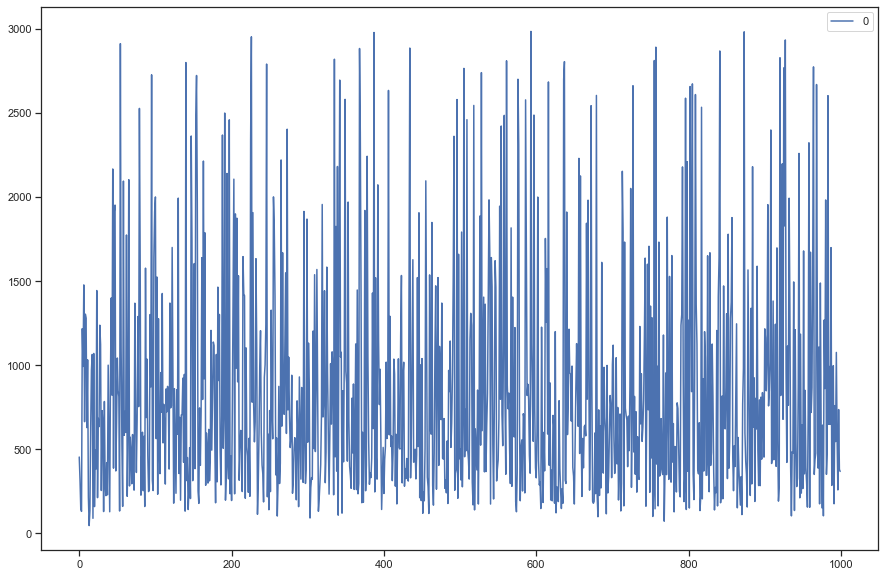

In [13]:
server_data.plot()

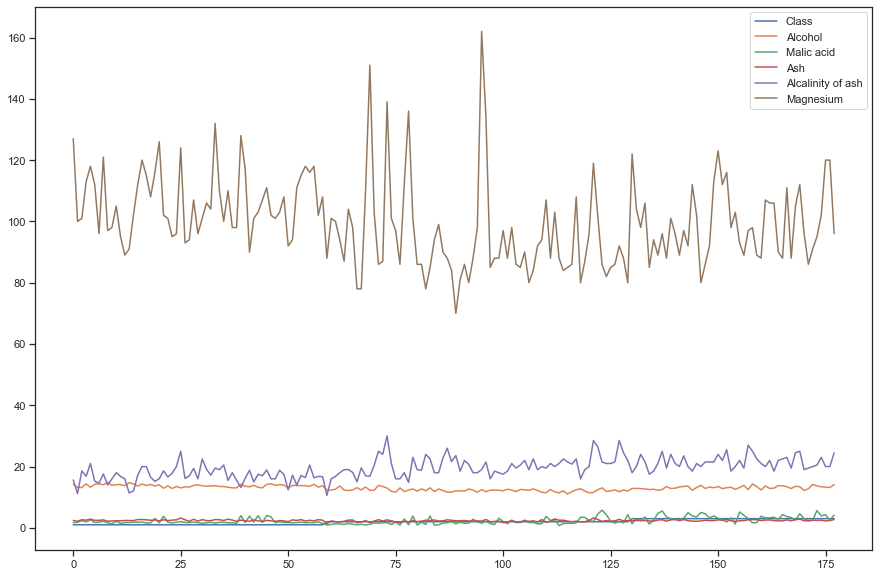

In [14]:
wine_data.plot()


## Histograms

**Histograms** : They are bar graph that displays relative frequencies of data values. It divide the range of values into a set of “bins” and then count the number of points that fall into each bin.The count for each bin is then plotted as a function of the position of the bin on the x-axis.

<br>**X-axis** : It is the value     **y-axis** : it is measure of frequency [raw counts of values/scaled proportions]

They are  very good beginning points for EDA. They are weak on providing intuition and crucially don't easily convey quantitative information from the graph. This is more obvious on larger datasets

Text(0.5, 1.0, 'Server Response Times')

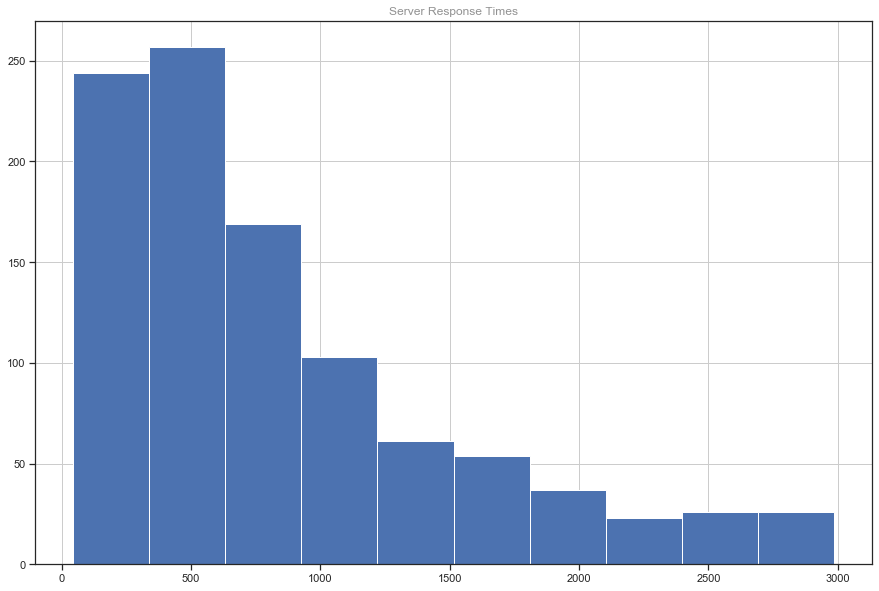

In [15]:
server_data.hist()
plt.title("Server Response Times", alpha=0.5)


The quality of any histogram depends on the choice of bin width. **Too large width** : results in losing too much detailed information about the data set. **Too small widht**: The shape of the distribution will not be discernible.

Unfortunately, there is no simple rule of thumb exists to predict a perfect bin width for a given data set. Usually several different values for the bin width must be experimented with until a satisfactory result is obtained. Sometimes a rough guideline for determining the bins size is the square root on the dataset size.

Below shows a histogram of this data set with the horizontal axis divided into 60 bins of 50 milliseconds width.

Text(0.5, 1.0, 'Server Response Times')

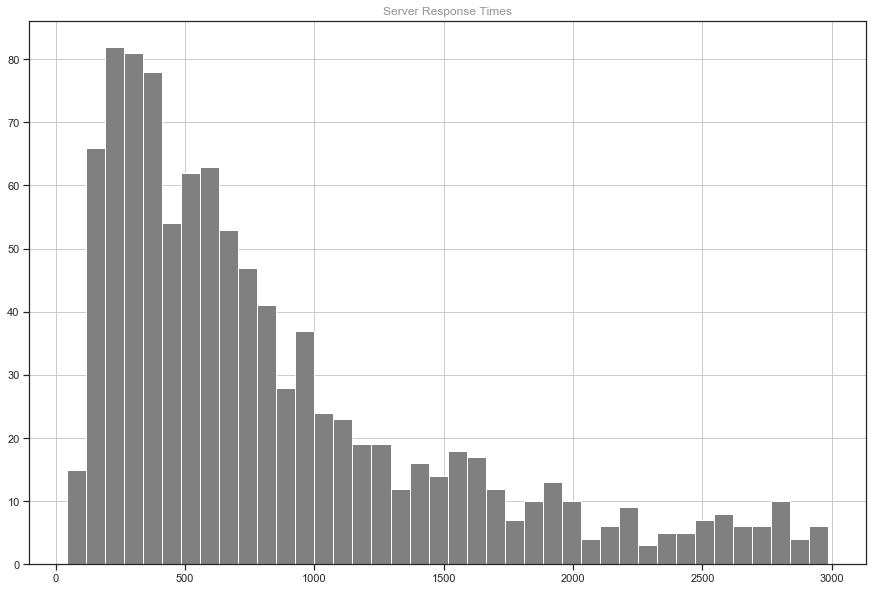

In [18]:
server_data.hist(bins=40,facecolor='grey')
plt.title("Server Response Times", alpha=0.5)

The histogram tells us that:

1. There is a rather sharp cut-off at a non zero value on the left, which means that there is a minimum completion time below which no request can be completed. 
2. Then there is a sharp rise to a maximum at the “typical” response time, and finally there is a relatively large tail on the right, corresponding to the smaller number of requests that take a long time to process.  

Key point: it is important to realize that **a data set does not determine a histogram uniquely**. Instead, it is largely the bin width (and to some degree the alignment of the bins) which influence the shape of a histogram.

We can rescale any of the axes as required. Careful when performing this. 

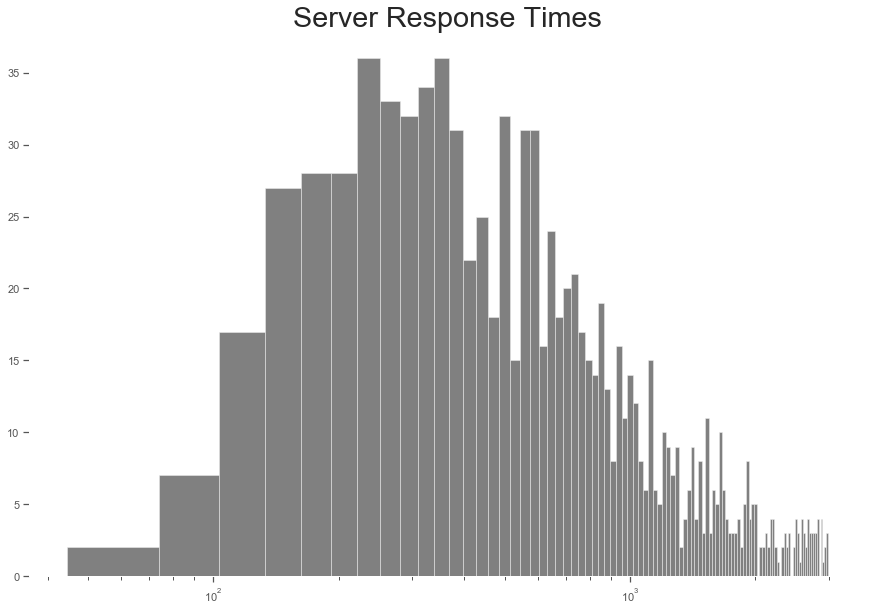

In [18]:
server_data.hist(bins=100,facecolor='grey')
plt.title("Server Response Times")
plt.xscale('log')

Text(0.5, 1.0, 'Server Response Times')

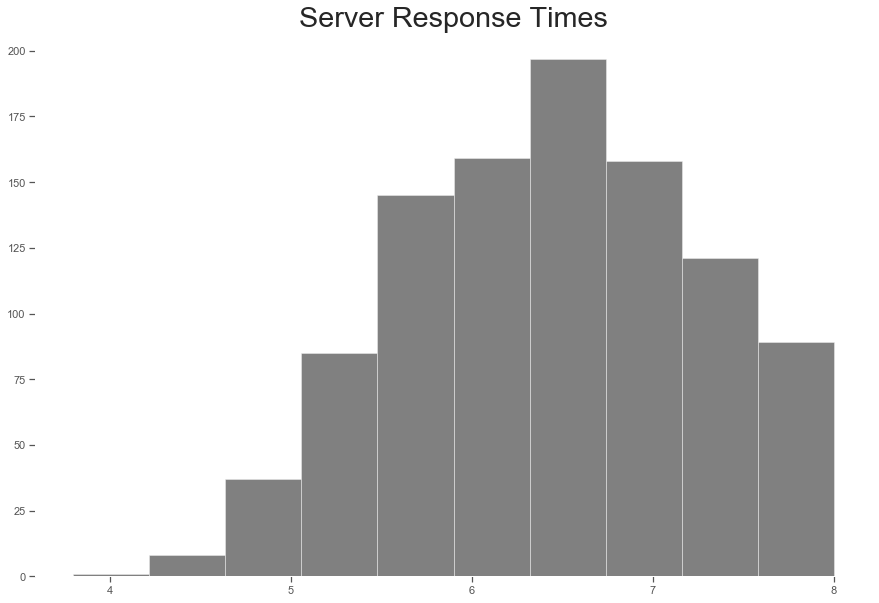

In [19]:
plt.hist(np.log(server_data[0]),facecolor='grey')
plt.title("Server Response Times")

While histograms are common and possess an intuitive interpretation, they also have some serious limitations [1]:

1. The binning process required by all histograms **loses information** (by replacing the location of individual data points with a bin of finite width). 

2. Histograms are **not unique**. The appearance of a histogram can be quite different depending on the settings. (This non uniqueness is a direct consequence of the information loss described in the previous item.)

3. On a more superficial level, histograms are **ragged and not**. This matters little if we just want to draw a picture of them, but if we want to feed them back into a computer as input for further calculations, then a smooth curve would be easier to handle.

4. Histograms **do not handle outliers gracefully**. A single outlier, far removed from the majority of the points, requires many empty cells in between or forces us to use bins that are too wide for the majority of points. It is the possibility of outliers that makes it difficult to find an acceptable bin width in an automated fashion.

In the multivariate case, we can get a sense of the distribution of the values for all of the variables at once (if there are not too many).

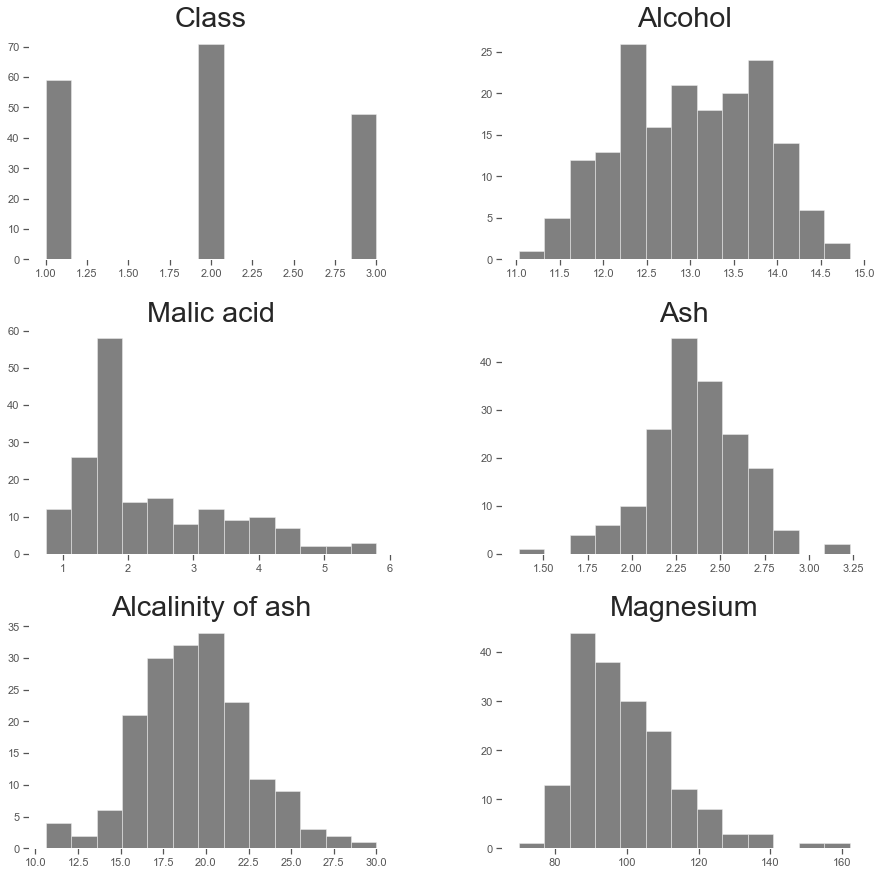

In [20]:
_ = wine_data.hist(bins=int(np.sqrt(len(wine_data))),facecolor='grey', figsize=(15, 15))


Given that we are dealing with a classification dataset, it makes sense to examine the distributions for various features by class label as follows:

In [21]:
_ = wine_data['Alcohol'].hist(by=wine_data['Class'], figsize=(15, 15), sharey=True, sharex=True, bins=int(np.sqrt(len(wine_data))), color='grey')


**FacetGrid class** : used when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. 

The main approach for visualizing data on this grid is with the FacetGrid.map() method. Provide it with a plotting function and the name(s) of variable(s) in the dataframe to plot. 

Let’s look at the distribution of tip percentages according to smoker status using a histogram.

In [22]:
g = sns.FacetGrid(tips, col="smoker", height=6)
g.map(plt.hist, "percentage")


We can use multiple features to generate separate plots: 

In [23]:
g = sns.FacetGrid(tips, row='smoker', col="sex", height=6)
g.map(plt.hist, "percentage")


### Kernel Density Estimates (KDEs) 

**KDE** : A kernel (smooth & strongly peaked function) is placed at the position of each data point. Then, all contributions from all kernels are added up to obtain a smooth curve along all points on the x-axis.


In KDEs, both the **type of a kernel and the bandwidth are tunable parameter**s in KDEs. 

**KDE is unique** for a given dataset and bandwidth

**KDE is smooth** if we choose a smooth kernel function (as gaussian function)

Text(0.5, 0, 'Response Times')

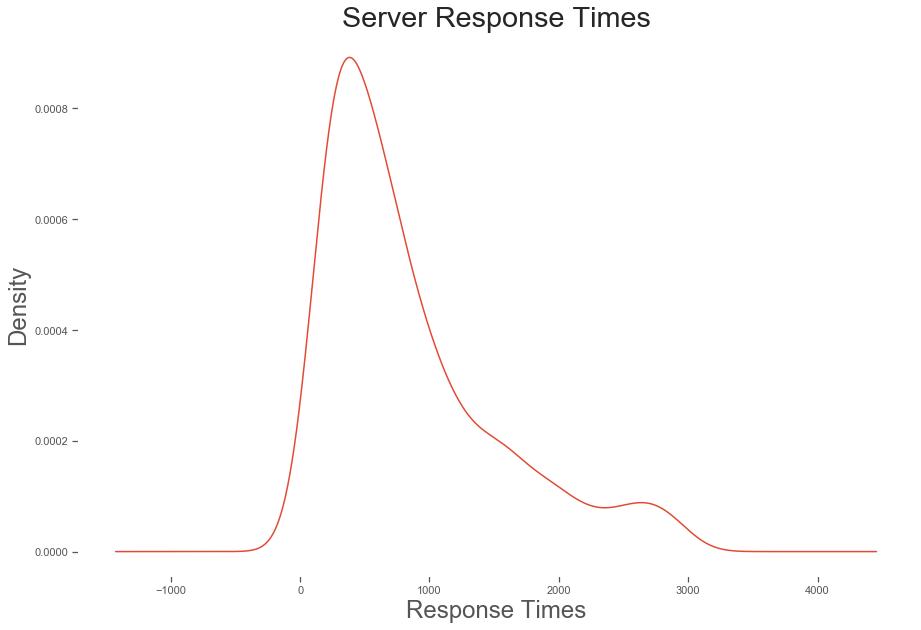

In [24]:
server_data[0].plot(kind='kde', title='Server Response Times', label='KDE pandas')
plt.xlabel('Response Times')

**Seaborn** has a tunable bandwidth for KDEs based on the Gaussian kernel.

In [25]:
sns.kdeplot(server_data[0], bw=20, color='blue', lw=1.0, label='KDE seaborn')

C:\Users\Kero El Almany\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.

The plots can be superimposed into a single figure if executed in the same block:

C:\Users\Kero El Almany\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.

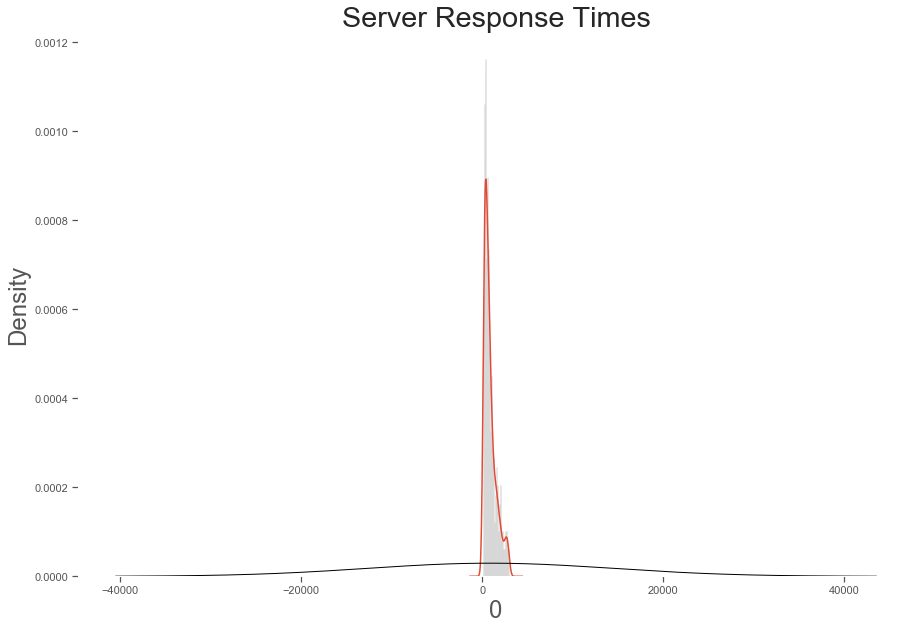

In [26]:
server_data.hist(bins=60, density=True, alpha=0.4, color='grey')
server_data[0].plot(kind='kde', title='Server Response Times', label='KDE pandas')
sns.kdeplot(server_data[0], bw=20, color='black', lw=1.0, label='KDE seaborn')


Seaborn provides a very nice short cut to plot the histogram + KDE plot in one graph

C:\Users\Kero El Almany\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Kero El Almany\Anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 20 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kero El Almany\AppData\R

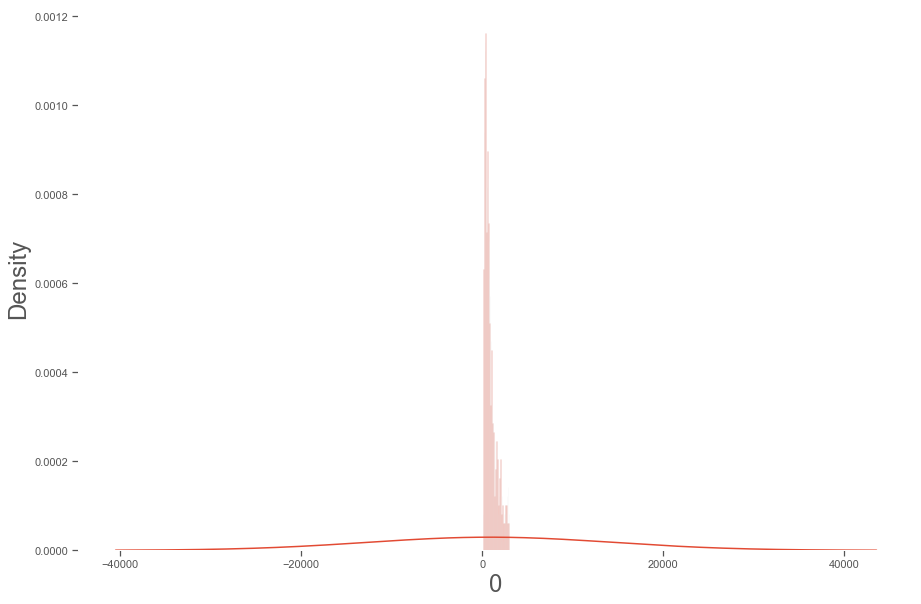

In [27]:
sns.distplot(server_data[0], bins=60, kde_kws={"bw": 20});


## The Cumulative Distribution Function (CDF)

The advantage of histograms and KDEs 
1. They have an **intuitive appeal**. 
2. They **convey how probable it is to observe a data point with a given value**. 

**ُُExample** Values around 250 milliseconds are very likely to occur, whereas values greater than 2,000 milliseconds are rare.

The question is 
1. **how rare is it, exactly?** 
2. **what fraction of requests completes in a certain band** 

To answer these questions easily, we need to **sum up the contributions from all bins in that region** and this is where the cumulative distribution function (CDF) appears.

**CDF at point x tells us what fraction of observations occurred “to the left” of x**. In other words, the CDF is the fraction of all points $x_i$ with $x_i ≤ x$.

We can plot a CDF programatically:

C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA40F594C8>]],
      dtype=object)

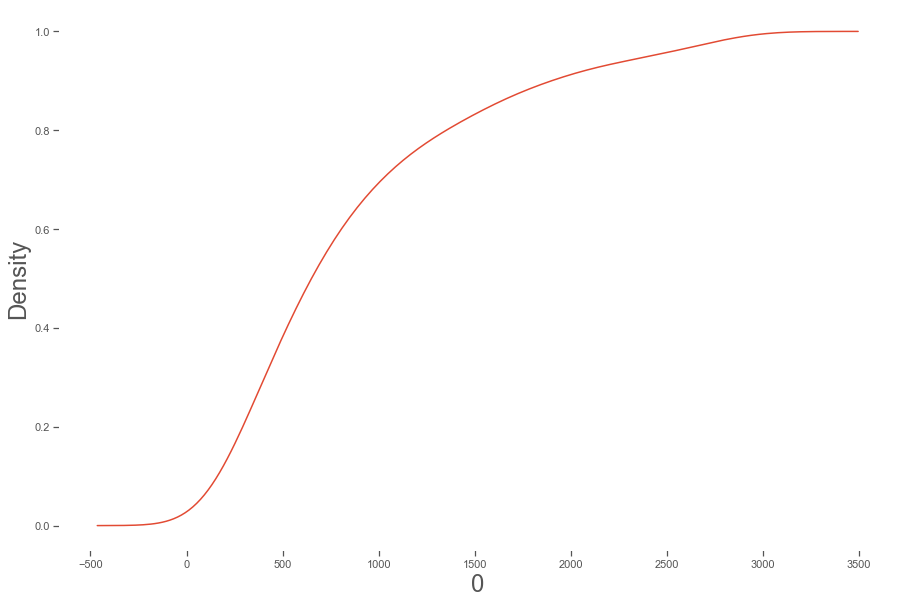

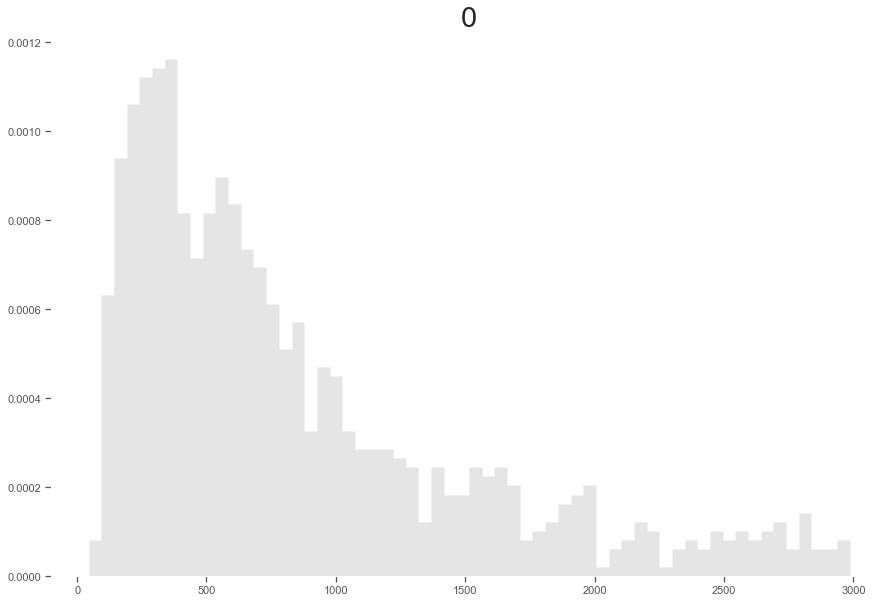

In [28]:
sns.kdeplot(server_data[0], cumulative=True, label='CDF')
server_data.hist(bins=60, density=True, alpha=0.2, color='grey', sharex=True)


A lot of observations can be read directly from the plot of the CDF. 
1. CDF is smaller than 0.85 for tail of distribtuion at  *t* = 1,500.(i.e 15% of all requests take longer than 1,500 milliseconds)
2.  CDF for t = 150 --> 0.05 and for t = 500 --> 0.40 .(i.e About 35 percent of all requests have response times of between 150 and 500 milliseconds)

On the other side, histogram or KDE can be misleading despite their intuitive appeal. By looking at histogram or KDE alone, “most” of the events occur within the major peak near t = 300 and tail contributes very litte. CDF tells us that this is not true.

**Why is that?**
<br>The eye is much better at judging distances than areas, and we are therefore misled by the large values of the histogram near its peak and fail to see that nevertheless the area beneath the peak is not that large compared to the total area under the curve**.)

CDFs are probably the least well-known and most under appreciated tool in basic graphical analysis. They have less immediate intuitive appeal than histograms or KDEs, but they allow us to make the kind of quantitative statement that is very often required but is difficult (if not impossible) to obtain from a histogram.

**CDFs have a number of important properties that follow directly from how they are calculated.**

1. Because the value of the CDF at position x is the fraction of points to the left of x, a CDF is always monotonically increasing with x.
2. CDFs are less wiggly than a histogram (or KDE) but contain the same information in a representation that is inherently less noisy.
3. Because CDFs do not involve any binning, they do not lose information and are therefore a more faithful representation of the data than a histogram.
4. All CDFs approach 0 as x goes to negative infinity. CDFs are usually normalized so that they approach 1 (or 100 percent) as x goes to positive infinity.
5. A CDF is unique for a given data set.

**Why is CDF not used compared to other tools**

They have less immediate intuitive appeal than histograms or KDEs, but they allow us to make the kind of quantitative statement that is very often required but is difficult (if not impossible) to obtain from a histogram. Note that CDFs is the least well-known and under appreciated tool in basic graphical analysis

**ًWhat is the most important properties of CDFs**
1. CDF is always monotonically increasing with x (Because the value of the CDF at position x is the fraction of points to the left of x)
2. They do not lose information and are therefore a more faithful representation of the data than a histogram (because CDFs do not involve any binning)
3. A CDF is unique for a given data set.
4. CDFs (or KDE) contain the same information in a representation that is inherently less noisy than histograms
5. All CDFs approach 0 as x goes to negative infinity. CDFs are usually normalized so that they approach 1 (or 100 percent) as x goes to positive infinity.

**Cumulative distribution functions have several uses**:
1. They enable us to answer questions such as : what fraction of points falls between any two values?
2. They help us understand how imbalanced a distribution is(i.e what fraction of the overall weight is carried by the tails)
3. We want to compare two distributions. It is notoriously difficult to compare two bell-shaped curves in a histogram against each other. 

# Only When Appropriate: Summary Statistics and BoxPlots

* Mean, median, standard deviation , precentiles are called summary statistics.

* Summary statistics apply only to **unimodal distributions** distributions that have a single centrel peak

* They apply only under certain assumptions and are misleading if those assumptions aren't fulfilled

## Summary Statistics

* To apply Summary statistics , data must be symmetric and doesn't contain extreme outliers.
* If a distribution has only a **single peak**, then it makes sense to ask about the properties of that peak: where is it located, and what is its width? Is the distribution symmetric? Is any outliers present?

**describe()** on data frame with numerical values, extract most of the simple summary statistics.

In [29]:
server_data.describe()


0
count  1000.000000
mean    849.188570
std     675.909154
min      44.500000
25%     347.265000
50%     630.940000
75%    1125.880000
max    2985.290000

## Box and Whisker Plots

**Box-and-whisker plot \ Box plot :** It is an interesting **graphical way to represent the summary statistics**, together with information about potential **outliers**.

**It consists of:**
    1. A marker/symbol for the median: indicator of the location of the distribution
    2. A box spanning the inter-quartile range (middle 50%): measure of the width of the distribution the midspread
    3. A set of whiskers extending from the central box to the upper and lower adjacent values, as an indicator of the tails of the distribution
    4.Individual symbols for all values outside the range of adjacent values** as a representation for outliers

While the inter-quartile range is a measure for the width of the central “bulk” of the distribution, the adjacent values are one possible way to express how far its tails reach. **The upper adjacent value** is the largest value in the data set that is less than twice the inter-quartile range greater than the median(i.e extend the whisker upward from the median to twice the length of the central box. Now trim the whisker to the largest value that actually occurs in the data set; this value is the upper adjacent value.

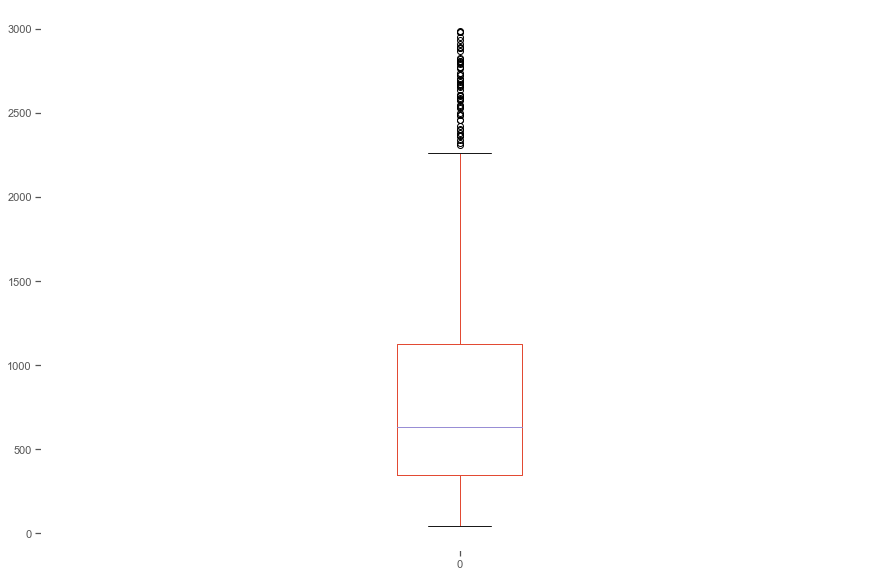

In [30]:
_ = server_data.boxplot()


C:\Users\Kero El Almany\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


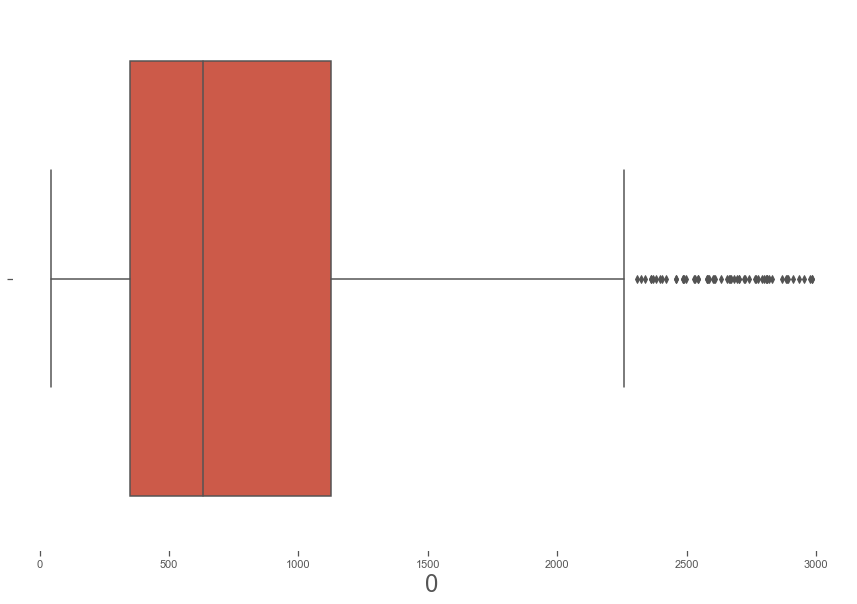

In [31]:
sns.boxplot(server_data[0])


In [32]:
np.log(wine_data.loc[:,'Alcohol':]).plot(kind='box')


In [33]:
wine_data[['Class','Alcohol']].boxplot(by='Class')


C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


We can add a third dimension again using hue:

In [34]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")

plt.title('Distribution of Total Bill values for each Day by Sex \n for the Tips Dataset', alpha=0.75, fontsize=30)
plt.ylabel('Total Bill', alpha=0.75)
plt.xlabel('Day', alpha=0.75)

Text(0.5, 0, 'Day')

## Violin Plot

A violin plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. The violin plot features a kernel density estimation of the underlying distribution.It is different from a box plot where  all of the plot components correspond to actual datapoints.

In [35]:
# Draw a nested violinplot and split the violins for easier comparison
sns.set(style="whitegrid", palette="pastel", color_codes=True)


Text(0.5, 0, 'Day')

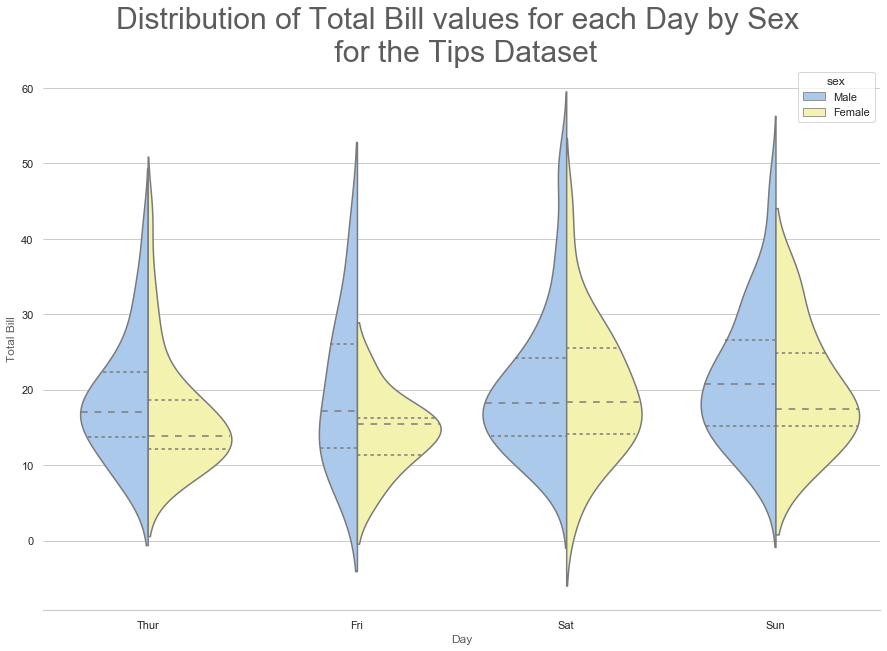

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
rcParams['font.size'] = 20
sns.violinplot(ax=ax, x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)
plt.title('Distribution of Total Bill values for each Day by Sex \n for the Tips Dataset', alpha=0.75, fontsize=30)
plt.ylabel('Total Bill', alpha=0.75)
plt.xlabel('Day', alpha=0.75)


## Bar Graphs

**bar graph** : It is the graphical representation of categorical data using rectangular bars where the length of each bar is proportional to the value they represent. 
<br>**Histogram**: It is the graphical representation of data where data is grouped into continuous number ranges and each range corresponds to a vertical bar.

In [37]:
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

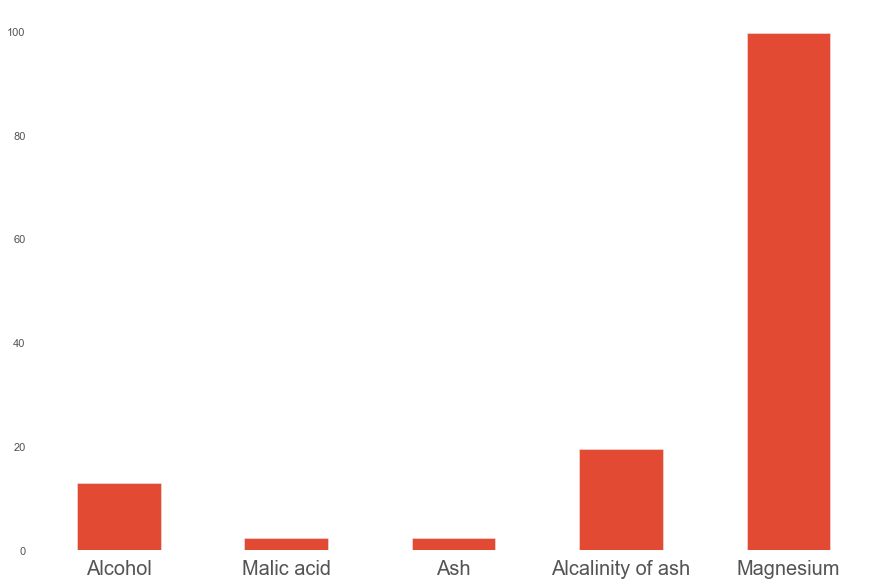

In [38]:
wine_data.loc[:,'Alcohol':].mean().plot(kind='bar')
plt.xticks(rotation=0, fontsize=20)

## SNS Plot instead of Matplotlib plot

* Default plot is point plot , other seaborn categorical plots have parameters [box plots] , [violin plots] , [bar plots] , [strip plots]
* The hue variable should be used for the most important comparisons as it is easier to compare positions that are closer together so it is important to choose how variables get mapped to the plot structure.

### Bar plot

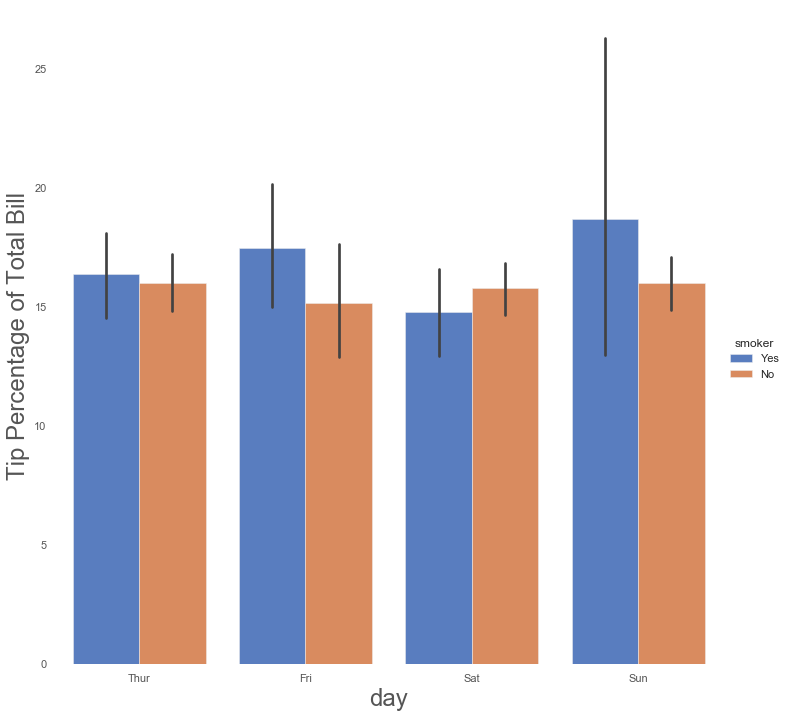

In [42]:
# Draw a nested barplot to show survival for class and sex
ax = sns.catplot(x="day", y="percentage", hue="smoker", data=tips,height=10, kind="bar", palette="muted")
ax.despine(left=True)
ax.set_ylabels("Tip Percentage of Total Bill")

### Strip plot

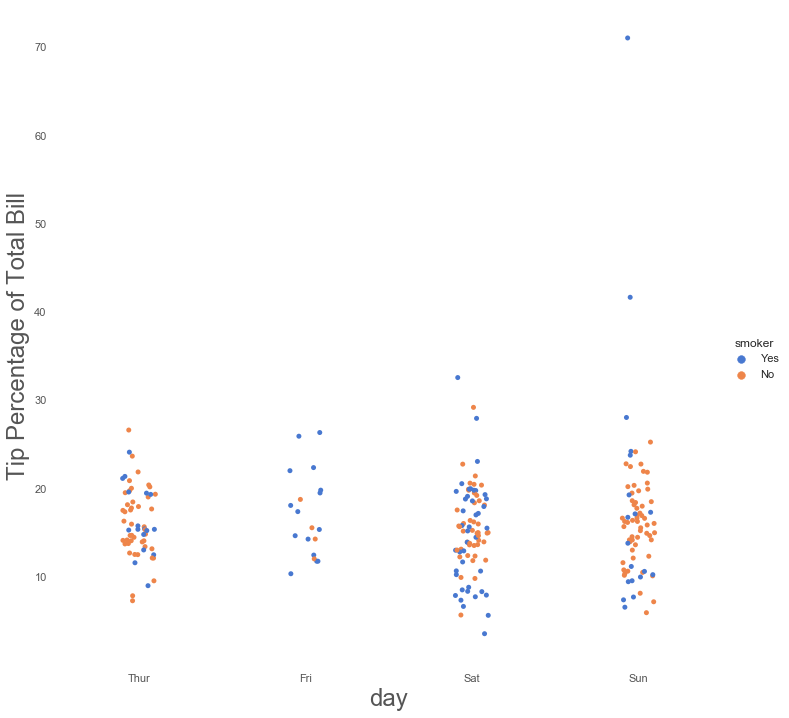

In [55]:
ax = sns.catplot(x="day", y="percentage", hue="smoker", data=tips,height=10, kind="strip", palette="muted")
ax.despine(left=True)
ax.set_ylabels("Tip Percentage of Total Bill")


## Scatter Plots

Scatter plots show us relationships between variables.

In [39]:
tips.columns


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'percentage'],
      dtype='object')

Text(0.5, 0, 'Tip')

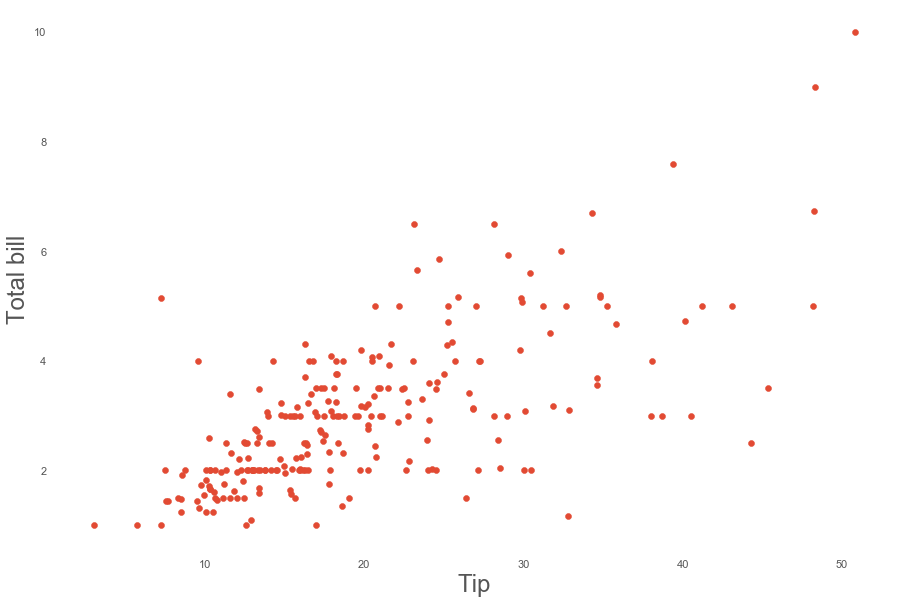

In [40]:
plt.scatter(tips.total_bill, tips.tip)
plt.ylabel('Total bill')
plt.xlabel('Tip')


**Third variable** : density of the individual dots.

Text(0.5, 0, 'Total bill')

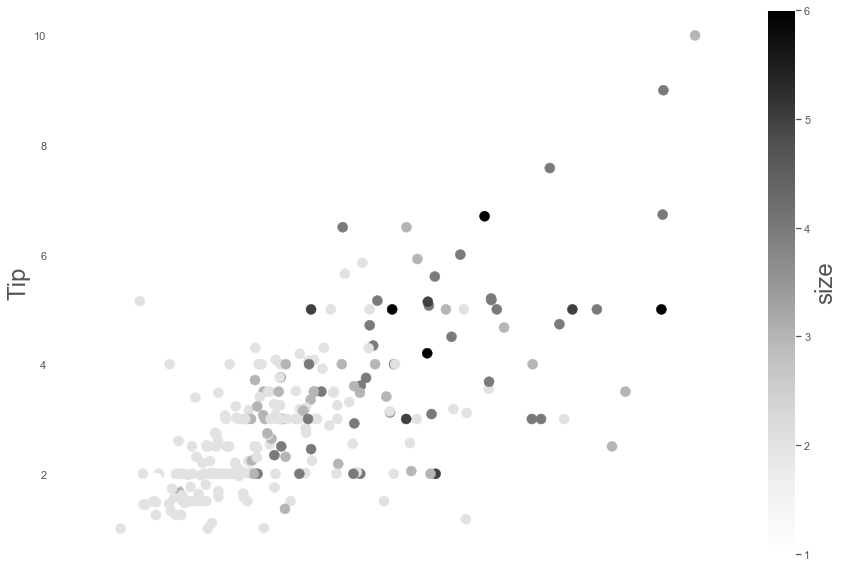

In [43]:
tips.plot(kind='scatter', x='total_bill', y='tip', c='size', s=100);
plt.ylabel('Tip')
plt.xlabel('Total bill')


**Third variable** : volume of the dots:

Text(0.5, 0, 'Total bill')

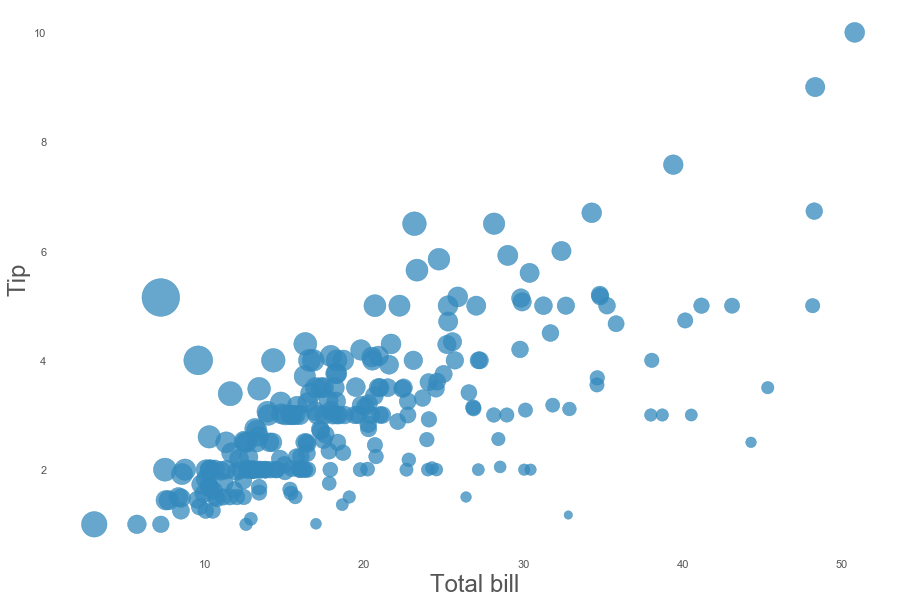

In [44]:
tips.plot(kind='scatter', x='total_bill', y='tip', s=tips['percentage']*20, alpha=.75);
plt.ylabel('Tip')
plt.xlabel('Total bill')


## SNS Plot

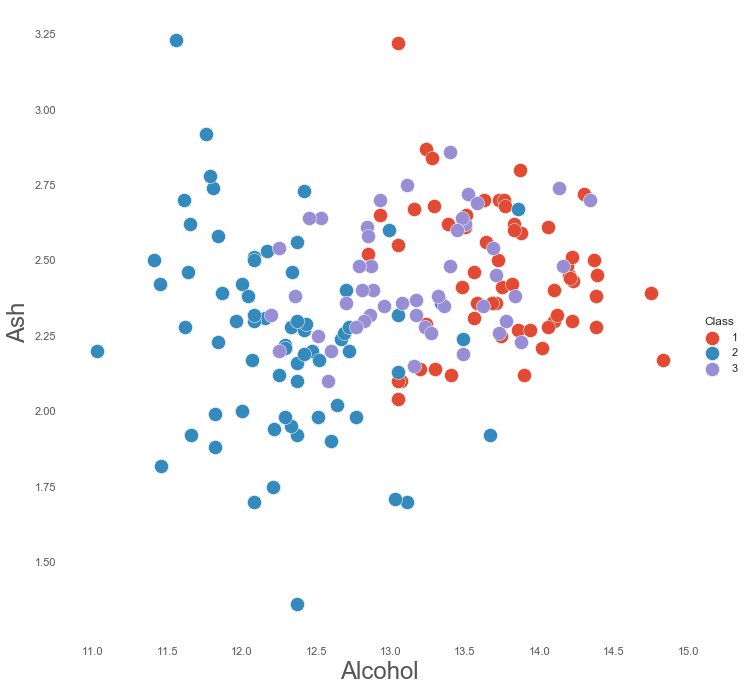

In [45]:
g = sns.FacetGrid(wine_data,  hue="Class", height=10)
g.map(plt.scatter, "Alcohol", "Ash", s=200, edgecolor="w").add_legend()

Using hue we can represent the third variable and generate scatter plots instead: 

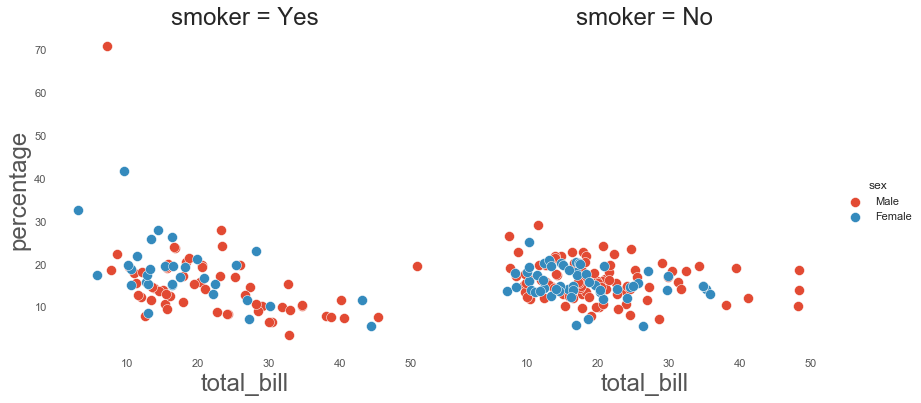

In [49]:
g = sns.FacetGrid(tips, col="smoker",  hue="sex", height=6)
g.map(plt.scatter, "total_bill", "percentage", s=100, edgecolor="w").add_legend()


# Plotting Multivariate data 

**Scatter-matrix plot**: It displays correlations between all features in a pair-wise manner to see if relationships exist between different features within a dataset

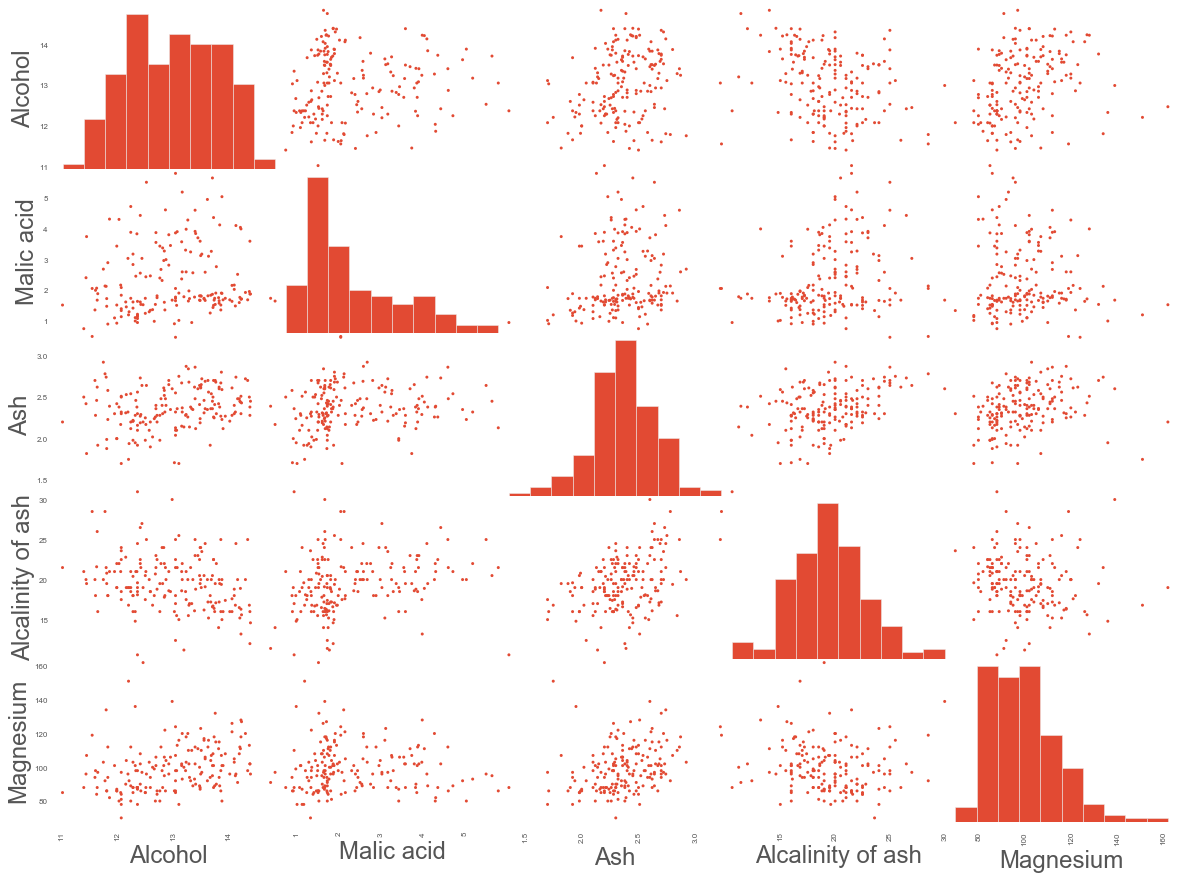

In [50]:
_ = pd.plotting.scatter_matrix(wine_data[wine_data.columns[1:6]], alpha=1, figsize=(20, 15), diagonal='hist')


## SNS Plot

C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__i

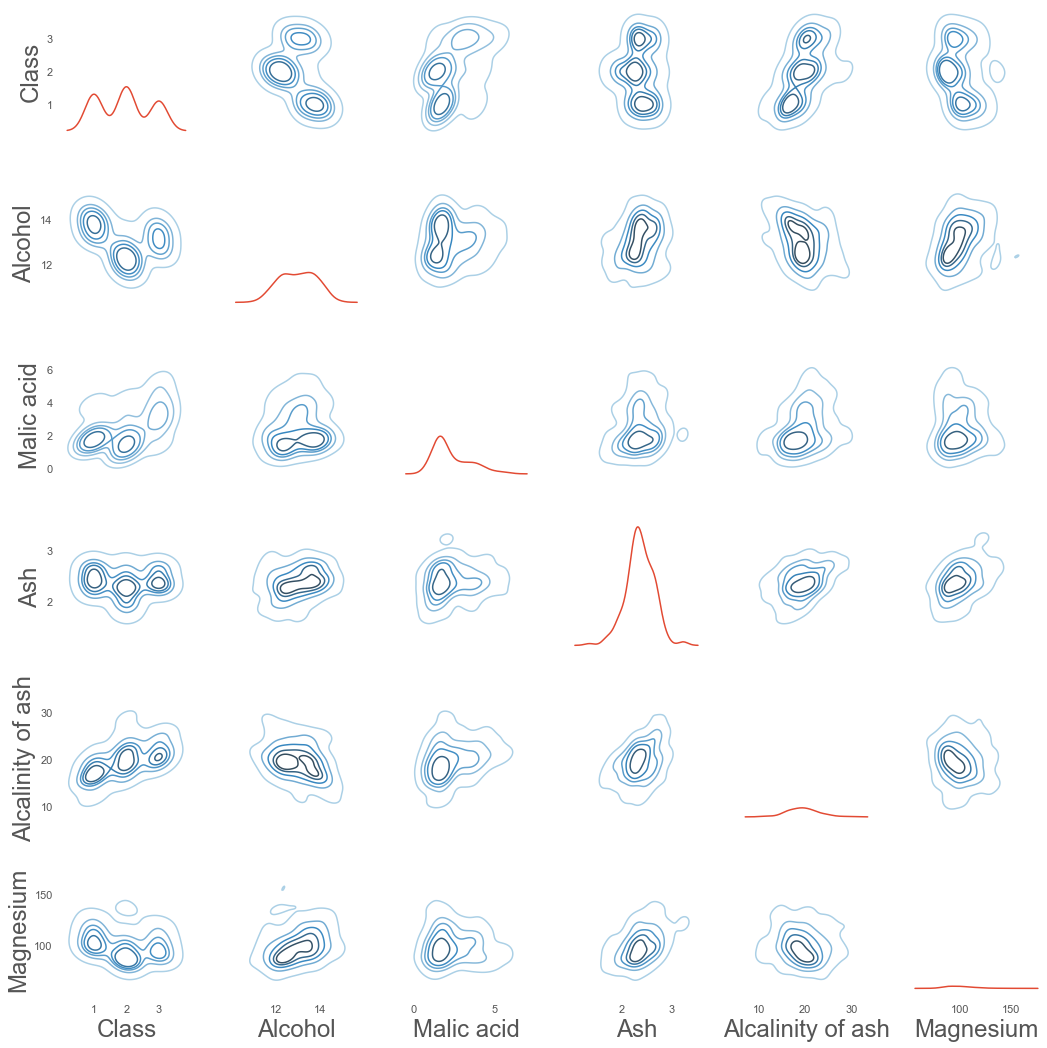

In [51]:
g = sns.PairGrid(wine_data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

**Joint Plot** : A simple plot showing the strength of relationship between two features can be rendered below using seaborn's jointplot. This results in a combination of :
* a scatter plot between two variables, 
* a regression line (with a confidence interval) 
* histograms and the KDE's of each feature.

Not important note: The symbol for Pearson's correlation is "ρ" when it is measured in the population and "r" when it is measured in a sample.Pearson's correlation coefficient can range from -1 to 1. An r of -1 indicates a perfect negative linear relationship between variables, an r of 0 indicates no linear relationship between variables, and an r of 1 indicates a perfect positive linear relationship between variables. 

C:\Users\Kero El Almany\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Kero El Almany\AppData\Roaming\Python\Python37

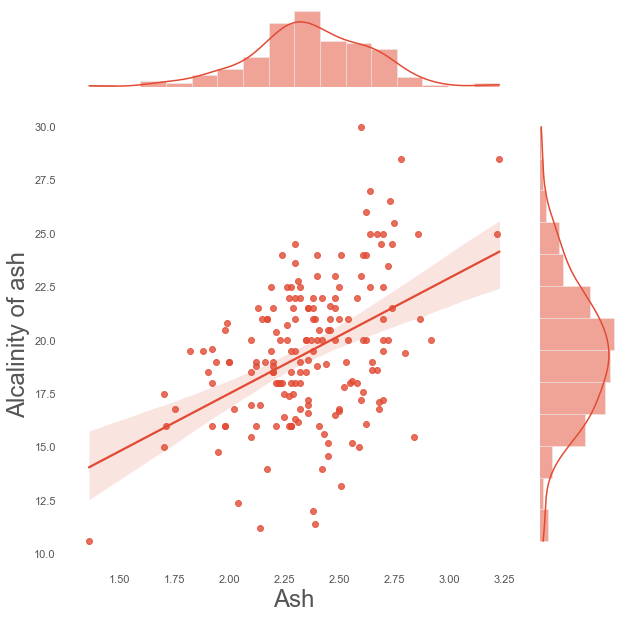

In [52]:
sns.jointplot("Ash", "Alcalinity of ash", wine_data, kind='reg', height=9);

# Reference material

matplotlib is a relatively low-level plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexibility to allow the user to completely customize the look of the output.

### 3d Plotting 

C:\Users\Kero El Almany\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


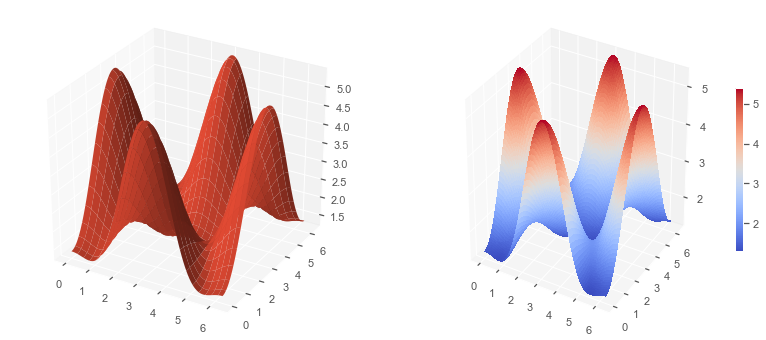

In [53]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from numpy import *
import matplotlib as mpl

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)

fig = plt.figure(figsize=(14,6))

alpha = 0.7
phi_ext = 2 * pi * 0.5


phi_m = linspace(0, 2*pi, 100)
phi_p = linspace(0, 2*pi, 100)
X,Y = meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=mpl.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

fig.show()
